# Chatbot Wawancara Kandidat Kerja

Seiring perkembangan jaman dan teknologi mengharuskan seluruh aktivitas dalam perusahaan terdigitalisasi, salah satunya yaitu pada proses rekrutmen karyawan khususnya pada tahap wawancara. Kemudian tidak menutup kemungkinan timbul permasalahan yaitu pewawancara kurang mampu membangun suasana wawancara yang menyenangkan dan memberikan pertanyaan atau respon pada pelamar bergantung pada suasana hati pewawancara sehingga proses wawancara kurang berjalan normal dan dapat mempengaruhi penilaian untuk pelamar.

<br>

Oleh sebab itu, dibuatlah Chatbot untuk Proses Wawancara Kandidat Karyawan dengan Algoritma Long Short Term Memory (LSTM)”. Chatbot ini dibangun dengan menggunakan bahasa pemrograman Python dan algoritma Long Short Term Memory (LSTM) pada metode Natural Language Processing. Pendekatan tersebut dilatih dengan menggunakan lapisan-lapisan tersembunyi pada Neural Network dan akan mengambil respon terbaik berdasarkan jawaban dari pelamar (User).

<br>

Chatbot ini dibuat dengan tahapan sebagai berikut,

1.   Import Library
2.   Load Dataset
1.   Preprocessing Data
1.   RNN Model (LSTM)
2.   Testing

# Import Library

In [ ]:
# Digunakan untuk pengolahan data dengan bahasa manusia
import nltk
# Digunakan untuk membantu proses lematisasi
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# Digunakan untuk membaca file JSON
import json 
# Digunakan untuk menyimpan dan membaca data ke dalam atau dari suatu file berformat .pkl.
import pickle
# Digunakan untuk perhitungan numerik
import numpy as np 
# Digunakan untuk membaca dataset dan mengubahnya ke Pandas Dataframe
import pandas as pd
# Digunakan untuk komputasi numerik dengan menggunakan machine learning, deep learning, atau neural network
import tensorflow as tf 
# Digunakan untuk menampung model
from tensorflow.keras.models import Model
# Membantu proses memecah string menjadi token.
from tensorflow.keras.preprocessing.text import Tokenizer
# Digunakan untuk mengisi urutan vektor dengan panjang yang sama
from tensorflow.keras.preprocessing.sequence import pad_sequences 
# Mengekstrak dan menggunakannya untuk pengkodean data
from sklearn.preprocessing import LabelEncoder 
from keras.models import Sequential
# Input digunakan masuk ke jaringan lapisan berikutnya. Embedding mempresentasikan kata menjadi sebuah vektor. Lstm metode arsitektur (RNN) yang biasa digunakan DL
from keras.layers import Input,Flatten,LSTM,Embedding,Dense
# Digunakan sebagai mode loss
from tensorflow.keras.losses import CategoricalCrossentropy
# Digunakan untuk visualisasi
import matplotlib.pyplot as plt 
# Digunakan untuk membantu proses stopwords
from nltk.corpus import stopwords
# Digunakan untuk melakukan random angka
import random
# Digunakan untuk membantu mengubah data kebentuk categorical
from tensorflow.keras.utils import to_categorical
import re

### Download Package

In [ ]:
# Package stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Package sentence tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Package lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Load Dataset

In [ ]:
# Data tag
tags = []
# Data input atau pattern
inputs = []
# Data respon
responses = {}
# Data kata
words=[] 
# Data Kelas atau Tag
classes = [] 
# Data Kalimat Dokumen
documents = [] 
# Mengabaikan tanda spesial karakter
ignore_words = ['?', '!'] 

# Melakukan import dataset
data_file = open('intents.json').read()
intents = json.loads(data_file)

In [ ]:
for intent in intents['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [ ]:
# Konversi data json ke dalam dataframe
df = pd.DataFrame({"patterns":inputs, "tags":tags})

In [ ]:
# Cetak data keseluruhan
df 

,patterns,tags
0,"hai salam kenal, nama saya",salam
1,haii,salam
2,hei,salam
3,halo,salam
4,hello,salam
...,...,...
718,terima kasih,penutup
719,Ok bye,penutup
720,good bye,penutup
721,"bye, see you",penutup


# Preprocessing Data

### Remove Punctuation

In [ ]:
# Menghilangkan punktuasi atau tanda baca
import string
df['patterns'] = df['patterns'].apply(lambda sequence:
                                            [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])

In [ ]:
# Cetak 5 data awal
df.head()

,patterns,tags
0,"[h, a, i, , s, a, l, a, m, , k, e, n, a, l, ...",salam
1,"[h, a, i, i]",salam
2,"[h, e, i]",salam
3,"[h, a, l, o]",salam
4,"[h, e, l, l, o]",salam


In [ ]:
df['patterns'] = df['patterns'].apply(lambda wrd: ''.join(wrd))

In [ ]:
# Cetak 5 data awal
df.head()

,patterns,tags
0,hai salam kenal nama saya,salam
1,haii,salam
2,hei,salam
3,halo,salam
4,hello,salam


### Lemmatization

In [ ]:
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents
print (len(documents), "documents")

# classes = intents
print (len(classes), "classes", classes)

# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

45365 documents
16 classes ['alamat', 'alasan_menerima', 'gaji', 'info_loker', 'kekurangan', 'kelebihan', 'kontribusi', 'nama', 'pendidikan_terakhir', 'pengalaman', 'penutup', 'posisi', 'salam', 'skill', 'tentang_perusahaan', 'umur']
816 unique lemmatized words ['&', '(', ')', ',', '.', '10.000.000.00', '15.000.000.00', '2', '20.000.000.00', '21', '22', '23', '24', '25', '26', '27', '3', '30', '35', '4', '4.0', '5', '5.000.000.00', '6', '7', 'abad', 'abang', 'ada', 'adalah', 'adik', 'agar', 'agustus', 'ahli', 'ai', 'akademi', 'akan', 'akanmemberikan', 'aktif', 'aku', 'akun', 'aliyah', 'amat', 'ambisius', 'anak', 'analisis', 'analys', 'anda', 'antara', 'apa', 'apabila', 'aplikasi', 'april', 'arahan', 'asa', 'asing', 'assalamualaikum', 'atas', 'atau', 'aura', 'ayah', 'background', 'bagi', 'bagus', 'bahagia', 'bahasa', 'bahkan', 'bahwa', 'baik', 'baliho', 'banyak', 'bapak', 'bapak/ibu', 'baru', 'beberapa', 'begitu', 'bekerja', 'bekerjasama', 'belajar', 'belakang', 'belum', 'bendahara', 'b

In [ ]:
# Menyimpan data words dan classes
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

### Tokenization

In [ ]:
# Melakukan tokenisasi data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(df['patterns'])

# Mengubah teks kedalam bentuk sequence
train = tokenizer.texts_to_sequences(df['patterns'])

In [ ]:
# Melihat tokenisasi dari setiap kata
tokenizer.word_index

{'saya': 1,
 'yang': 2,
 'perusahaan': 3,
 'adalah': 4,
 'ini': 5,
 'dalam': 6,
 'di': 7,
 'dengan': 8,
 'bekerja': 9,
 'melalui': 10,
 'memiliki': 11,
 'tidak': 12,
 'dan': 13,
 'dapat': 14,
 'ingin': 15,
 'selamat': 16,
 'untuk': 17,
 'kerja': 18,
 'mampu': 19,
 'bisa': 20,
 'mengetahuinya': 21,
 'mengetahui': 22,
 'tahun': 23,
 'baik': 24,
 'oleh': 25,
 'pengalaman': 26,
 'pendidikan': 27,
 'sebagai': 28,
 'posisi': 29,
 'saat': 30,
 'dari': 31,
 'tinggal': 32,
 'kelebihan': 33,
 'mudah': 34,
 'rp': 35,
 'nama': 36,
 'melamar': 37,
 'orang': 38,
 'pada': 39,
 'terakhir': 40,
 'karena': 41,
 'gaji': 42,
 'membuat': 43,
 'kemampuan': 44,
 'diberitahu': 45,
 'diri': 46,
 'bahasa': 47,
 'pernah': 48,
 'tim': 49,
 'data': 50,
 'sangat': 51,
 'lahir': 52,
 'melihat': 53,
 'kecewa': 54,
 'diterima': 55,
 'sekitar': 56,
 'menggunakan': 57,
 'memberikan': 58,
 'kekurangan': 59,
 'diposisi': 60,
 'kontribusi': 61,
 'apa': 62,
 'akan': 63,
 'berusia': 64,
 'tinggi': 65,
 'pekerjaan': 66,
 'kur

### Padding

In [ ]:
# Melakukan padding agar setiap sequence memiliki panjang yang sama
features = pad_sequences(train)

In [ ]:
# Menampilkan padding Sequences
print(features)

[[  0   0   0 ... 280  36   1]
 [  0   0   0 ...   0   0 422]
 [  0   0   0 ...   0   0 281]
 ...
 [  0   0   0 ...   0 222 279]
 [  0   0   0 ... 279 810 811]
 [  0   0   0 ... 111  18 812]]


### Encoding

In [ ]:
# Melakukan encoding terhadap output atau label (tag)
le = LabelEncoder()
labels = le.fit_transform(df['tags'])

In [ ]:
# Menampilkan Label Encodings
print(labels)

[12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  4  4  4  4  4  4  4  4  4  4  4

In [ ]:
# Menyimpan proses label encoder dan tokenizer
pickle.dump(le, open('le.pkl','wb'))
pickle.dump(tokenizer, open('tokenizer.pkl','wb'))

### Input Output Shape & Vocabulary

In [ ]:
# Mengetahui panjang maksimal untuk input data
input_shape = features.shape[1]
print(input_shape)

47


In [ ]:
# Mendefinisikan panjang vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)

# Mendefinisikan panjang output
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  812
output length:  16


# RNN Model (LSTM)

### Build Model

In [ ]:
# Membuat Modeling
model = tf.keras.Sequential()
# Layer Input
model.add(Input(shape=(input_shape,)))
# Layer Embedding
model.add(Embedding(vocabulary+1, 16, input_length=(input_shape,)))
# Layer Long Short Term Memory
model.add(LSTM(10, return_sequences=True))
# Layer Flatten
model.add(Flatten()) 
# Layer Dense
model.add(Dense(output_length, activation="softmax"))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Menampilkan Parameter Model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 47, 16)            13008     
                                                                 
 lstm_6 (LSTM)               (None, 47, 10)            1080      
                                                                 
 flatten_6 (Flatten)         (None, 470)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                7536      
                                                                 
Total params: 21,624
Trainable params: 21,624
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Untuk melakukan penghentian otomatis pelatihan
from keras.callbacks import TensorBoard, EarlyStopping
callback = EarlyStopping(monitor = 'loss', patience = 1, mode = 'min', restore_best_weights = True)

In [ ]:
# Melatih model data
train = model.fit(features, labels, epochs=100, callbacks=[callback], verbose=1)

Epoch 1/100
23/23 [==============================] - 3s 20ms/step - loss: 2.7129 - accuracy: 0.1770
Epoch 2/100
23/23 [==============================] - 0s 20ms/step - loss: 2.6042 - accuracy: 0.1798
Epoch 3/100
23/23 [==============================] - 0s 20ms/step - loss: 2.5778 - accuracy: 0.1798
Epoch 4/100
23/23 [==============================] - 0s 20ms/step - loss: 2.5399 - accuracy: 0.1881
Epoch 5/100
23/23 [==============================] - 0s 20ms/step - loss: 2.4752 - accuracy: 0.1950
Epoch 6/100
23/23 [==============================] - 0s 21ms/step - loss: 2.3691 - accuracy: 0.2102
Epoch 7/100
23/23 [==============================] - 0s 20ms/step - loss: 2.2316 - accuracy: 0.3181
Epoch 8/100
23/23 [==============================] - 0s 21ms/step - loss: 2.0710 - accuracy: 0.3126
Epoch 9/100
23/23 [==============================] - 0s 20ms/step - loss: 1.8895 - accuracy: 0.4343
Epoch 10/100
23/23 [==============================] - 0s 20ms/step - loss: 1.6897 - accuracy: 0.4979

### Model Analysis

In [ ]:
# Membuat fungsi untuk menampilkan plot hasil akurasi
import matplotlib as mpl
def draw_plot(data, type_data):
  mpl.style.use('seaborn')
  plt.figure(figsize = (20, 5))
  plt.plot(data,'darkblue', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

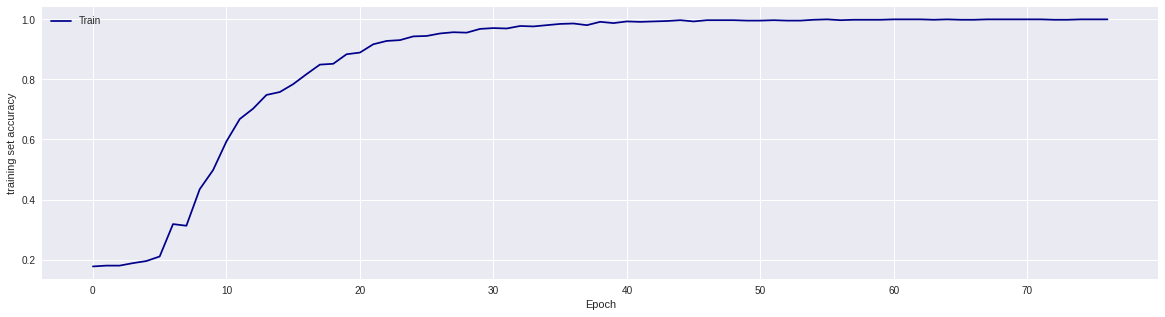

In [ ]:
# Menampilkan plot akurasi
draw_plot(train.history['accuracy'],'training set accuracy' )

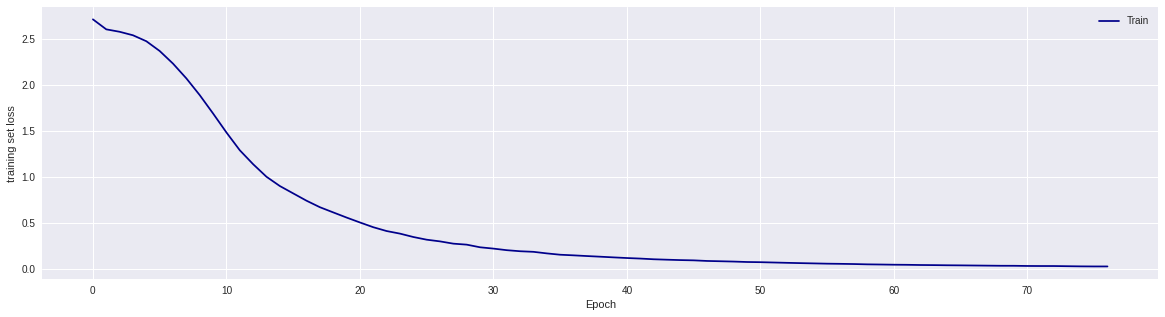

In [ ]:
# Menampilkan plot loss
draw_plot(train.history['loss'],'training set loss' )

### Save the Model

In [ ]:
# Menyimpan model
model.save('chatbot_model.h5', train)

# Testing

In [ ]:
# Membuat percakapan pembuka
print("Bot : Selamat datang! Silahkan kirim pesan sapaan untuk memulai proses wawancara")
print("="*60 + "\n")

# Membuat Input Chat
while True:
  # List kosong untuk menampung inputan pengguna
  texts_p = []
  # Untuk input user
  prediction_input = input('User : ')
  
  # Menghapus punktuasi dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  # Mendapatkan hasil keluaran pada model 
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag
  response_tag = le.inverse_transform([output])[0]
  print("Bot : ", random.choice(responses[response_tag]))
  print("="*60 + "\n")

  # mendefinisikan respon tag 'penutup' agar bot bisa berhenti
  if response_tag == "penutup":
    break    


Bot : Selamat datang! Silahkan kirim pesan sapaan untuk memulai proses wawancara

User : haloo, apa kabar
1/1 [==============================] - 0s 18ms/step
Bot :  Halo, Silahkan perkenalkan diri anda dengan format sebagai berikut: Perkenalkan nama lengkap saya adalah ... (isi titik - titik sesuai data anda) 

User : nama saya alwizain
1/1 [==============================] - 0s 18ms/step
Bot :  Silahkan informasikan usia Anda dengan format sebagai berikut: Usia saya saat ini adalah ... tahun (isi titik - titik sesuai data anda

User : usia saya 20 tahun
1/1 [==============================] - 0s 23ms/step
Bot :  Silahkan tuliskan alamat Anda dengan format: Saya beralamat di ... (isi titik - titik sesusai data anda)

User : alamat saya di bandung
1/1 [==============================] - 0s 27ms/step
Bot :  Ceritakan pengalaman kerja Anda dengan format sebagai berikut: Saya memiliki pengalaman kerja di ... selama ... tahun (isi titik - titik sesuai data anda). Jika anda belum memiliki penga